# CONTEO DE OBJETOS CON YOLO/YOLO WORDL/JEPA CASUAL

Veremos una aplicación de la detección de objetos en YOLO/YOLOWORLD: el conteo de objetos.

Este sencillo principio puede tener aplicación en campos como el manejo de inventarios y ventas minoristas; monitoreo de estanterías en supermercados; monitoreo del tráfico en vías; monitoreo de multitudes en lugares de alta afluencia; agricultura de precisión y manufactura y líneas de ensamble, entre otras.


## ¿Qué es el conteo de objetos?

Es una aplicación de Visión por Computador consiste en **detectar y realizar el conteo de diferentes tipos de objetos en una imagen o en una secuencia de video**

![](https://drive.google.com/uc?export=view&id=1hsBhv70ivSeaZSEZBRanN9OH8fCG5hVk)
(*imagen tomada de: https://www.labellerr.com/blog/object-counting-and-sorting-using-computer-vision/ *)

## El problema a resolver

Nos interesa desarrollar un sistema de Visión por Computador que sea capaz de realizar el conteo automático de objetos en estanterías de supermercados

Esto podría tener aplicaciones por ejemplo en el manejo de inventarios y el surtido de productos en supermercados.

## El set de datos a usar y librerías requeridas

Usaremos una versión modificada del set de datos [bbox-retail](https://universe.roboflow.com/new-workspace-l2a1a/bbox-retail), disponible de forma gratuita en RoboFlow.

En este caso usaremos una versión más pequeña, que contendrá:
- 1.000 imágenes de entrenamiento
- 300 imágenes de validación
- 13 imágenes de prueba

Las imágenes de entrenamiento y validación se pueden usar para afinar un modelo YOLO/YOLOWORLD de detección de objetos, mientras que las de prueba las usaremos para verificar el conteo de objetos.

El set de datos se puede descargar de [este enlace](https://drive.google.com/file/d/1KtT_8zyylFiGmPP4xbAAxleVlTVHQFWB/view?usp=sharing)

Una vez descargamos el archivo .zip lo podemos ubicar en Google Colab y descomprimirlo:

In [ ]:
# Descomprimir dataset
!unzip "/content/bbox-retail.v4-tiled.yolov11_small.zip" -d /content/datasets

Ahora instalemos la librería "ultralytics" (para poder acceder a los modelos pre-entrenados):

In [ ]:
!pip install ultralytics

## 4. El modelo YOLO pre-entrenado

El conteo de objetos involucra dos fases:

1. Detección de objetos
2. Conteo de "bounding boxes" por cada tipo de objeto

Y el éxito de la aplicación radica en la detección de objetos.

Para ello tendremos que usar un modelo YOLO de detección de objetos pero tendremos que afinarlo para que logre detectar correctamente los objetos que se encuentran en nuestro set de datos.

Abajo se muestra el código para la afinación del modelo con el set de datos de este tutorial, pero para simplificar las cosas se puede descargar el modelo afinado de [este enlace](https://drive.google.com/file/d/1j1w6X_bQoepnMPR5cM0y87vAlpKNPb39/view?usp=sharing):

In [108]:
# Afinar modelo

from ultralytics import YOLO,YOLOWorld

# 1. Cargar el modelo (nano, el más pequeño)
#model = YOLO("yolo11n.pt")
model= YOLOWorld("/content/yolov8s-worldv2.pt")
classes=["coca cola can","coke can","coffee can","aluminum can","can",
         "sprite box","sprite carton","soda box","carton box","12 pack box",
         "pack box","case of soda","box"]
if classes:
    model.set_classes(classes)


# Afinar el modelo
results = model.train(data="/content/datasets/data.yaml",
                      epochs=10, # Número de iteraciones
                      imgsz=640, # Tamaño de las imágenes (máxima dimensión)
                      plots=False, # Guardar gráficos de entrenamiento
                      )

Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolov8s-worldv2.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

El siguiente paso es usar el modelo afinado. Para ello usamos el módulo "YOLO" de la librería "ultralytics":

In [ ]:
# Cargar modelo yolo pre-entrenado
from ultralytics import YOLOworld

# 1. Cargar el modelo afinado
#model = YOLO("/content/yolo11n_fine_tuned_retail.pt")
model=YOLOWorld("/content/yolov8s-world.pt")


Y podemos detectar los objetos en el set de prueba presentándole al modelo la ruta de dicho subset:

In [109]:
# Pronósticos sobre imágenes de prueba
preds = model("/content/datasets/test/images")


image 1/12 /content/datasets/test/images/prueba.jpg: 576x640 82 objects, 18.9ms
image 2/12 /content/datasets/test/images/test_10_jpg.rf.aa2d0bb6443cb9f68d7f10ae24fd912a.jpg: 640x640 12 objects, 19.8ms
image 3/12 /content/datasets/test/images/test_160_jpg.rf.e6b75a29eab190d12f755f8df49eb724.jpg: 640x640 36 objects, 18.6ms
image 4/12 /content/datasets/test/images/test_241_jpg.rf.6ff630ffebe47167514d54393bba7878.jpg: 640x640 38 objects, 18.4ms
image 5/12 /content/datasets/test/images/test_244_jpg.rf.83a1b83272fc6625af0d47be430a680c.jpg: 640x640 9 objects, 18.2ms
image 6/12 /content/datasets/test/images/test_32_jpg.rf.29ddc60011f66d25c23f54730205dcf3.jpg: 640x640 9 objects, 17.8ms
image 7/12 /content/datasets/test/images/test_473_jpg.rf.620982cbeab0072a7f487edb4e05e9de.jpg: 640x640 31 objects, 12.7ms
image 8/12 /content/datasets/test/images/test_535_jpg.rf.faf73b27276357cf9caa2bc28beb7c19.jpg: 640x640 37 objects, 12.7ms
image 9/12 /content/datasets/test/images/test_536_jpg.rf.d9721c5b7d04

Veamos algunos resultados de detección:

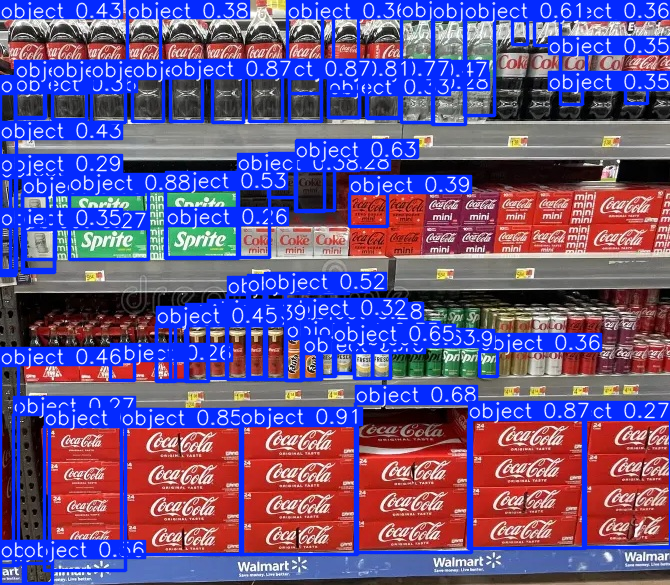

In [110]:
import numpy as np
idx = np.random.randint(len(preds))
preds[0].show()



## 5. Conteo de objetos con YOLO

Con el modelo afinado ya podemos realizar el conteo de objetos. La idea se muy simple: ¡simplemente debemos contar la cantidad de "bounding boxes" detectadas!

Veamos cómo hacer esto.

Tomemos una imagen del set de prueba y generemos la predicción:

In [111]:
#img_path = '/content/datasets/test/images/test_10_jpg.rf.aa2d0bb6443cb9f68d7f10ae24fd912a.jpg'
img_path = '/content/datasets/test/images/prueba.jpg'
pred = model(img_path)


image 1/1 /content/datasets/test/images/prueba.jpg: 576x640 82 objects, 18.6ms
Speed: 2.5ms preprocess, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)


Veamos qué contiene esta predicción:

In [ ]:
pred

En este caso nos interesa el atributo "boxes", que contiene precisamente los "bounding boxes" detectados:

In [ ]:
pred[0].boxes

Veamos por ejemplo cuántos "bounding boxes" fueron detectados:

In [104]:
len(pred[0].boxes)

1

Es decir que en principio tendremos !63 objetos detectados!

Veamos uno de estos boxes (por ejemplo el número 10):

In [ ]:
pred[0].boxes[9]

Algunos campos de interés:

- "cls": el tipo de objeto. En este caso **siempre** será 0 pues siempre tendremos el mismo tipo de objeto
- "conf": la probabilidad de que el objeto detectado pertenezca a la clase de interés (la clase 0)
- "data": coordenadas del bounding box + conf + cls

Así que la idea es preservar únicamente los "bounding boxes" cuyo nivel de confianza ("conf") sea relativamente alto (por ejemplo 0.7):

In [ ]:
pred[0].boxes.cls

In [112]:
UMBRAL_CONF = 0.4
boxes = [box for box in pred[0].boxes if box.conf > UMBRAL_CONF]
print(len(boxes))

33


Con esto hemos filtrado las "bounding boxes" para reducir la detección de falsos aciertos, pasando de 63 a sólo 13 boxes.

A continuación haremos el conteo. Este conteo sería algo tan simple como "len(boxes)" pero implementaremos la opción de realizar el conteo como si tuviésemos muchos tipos de objetos. Para ello usaremos el módulo "Counter" de Python:

In [113]:
from collections import Counter

conteos = Counter([int(box.cls) for box in boxes])
conteos

Counter({0: 33})

En este caso el diccionario "conteos" sólo tendrá un campo (pues sólo tendremos un tipo de objeto). Pero esta misma línea de código funcionará si tenemos múltiples objetos.

Cada par key-value en "conteos" corresponderá a un conteo para cada tipo de objeto.

¡Y listo, en principio ya tenemos el conteo de objetos!

Para facilitar la visualización de los resultados, agreguemos algo de visualización. Mostremos los objetos detectados y el conteo correspondiente:

In [114]:
model.names

{0: 'object'}


Conteos:
object: 33


(np.float64(-0.5), np.float64(669.5), np.float64(584.5), np.float64(-0.5))

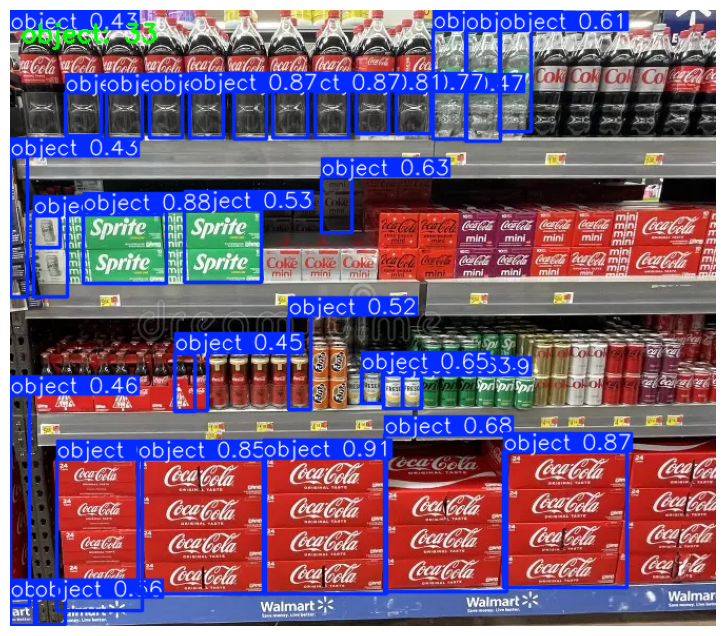

In [115]:
import cv2 # OpenCV
import matplotlib.pyplot as plt

# Mapear categoría de objeto a nombres e imprimir conteos
nombres = model.names
print("\nConteos:")
for cls_id, num in conteos.items():
    print(f"{nombres[cls_id]}: {num}")


# Extraer imagen con los bounding boxes > UMBRAL_CONF
p = pred[0] # Predicción
mascara = p.boxes.conf > UMBRAL_CONF
p.boxes = p.boxes[mascara]
img_bboxes = p.plot() # Imagen con los bounding boxes filtrados

# Añadir anotación mostrando los conteos (esquina superior izquierda)
anotacion = ", ".join([f"{nombres[c]}: {n}" for c, n in conteos.items()])
cv2.putText(img_bboxes, anotacion, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (0, 255, 0), 2)

# Convertir imagen de BGR a RGB
img_bboxes_rgb = cv2.cvtColor(img_bboxes, cv2.COLOR_BGR2RGB)

# Y mostrarla
plt.figure(figsize=(12, 8))
plt.imshow(img_bboxes_rgb)
plt.axis("off")

¡Y listo!

Para facilitar la visualización pongamos todo lo anterior en una función:

In [116]:
def mostrar_conteos(modelo, ruta_img, umbral=0.4):
    # Generar predicción
    pred = modelo(ruta_img, verbose=False)

    # Extraer bounding boxes cuyo "conf" sea superior a umbral
    boxes = [box for box in pred[0].boxes if box.conf > umbral]

    # Realizar conteos
    conteos = Counter([int(box.cls) for box in boxes])

    # Ejecutar la inferencia en una imagen
    results = model.predict(ruta_img)

    # Procesar y contar los resultados
    detections = sv.Detections.from_ultralytics(results[0])

    # Contar cuántos objetos hay en total
    #print(f"Objetos detectados: {len(detections)}")

    # Contar por cada clase específica

    for class_id, class_name in enumerate(classes):
        count = len(detections[detections.class_id == class_id])
        print(f"{class_name}: {count}")


    # Mapear categoría de objeto a nombres e imprimir conteos
    nombres = model.names
    print("\nConteos:")
    for cls_id, num in conteos.items():
        print(f"->{nombres[cls_id]}: {num}")

    # Extraer imagen con los bounding boxes > umbral
    p = pred[0]
    mascara = p.boxes.conf > umbral
    p.boxes = p.boxes[mascara]
    img_bboxes = p.plot() # Imagen con los bounding boxes filtrados

    # Añadir anotación mostrando los conteos (esquina superior izquierda)
    anotacion = ", ".join([f"{nombres[c]}: {n}" for c, n in conteos.items()])
    cv2.putText(img_bboxes, anotacion, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (0, 255, 0), 2)

    # Convertir imagen de BGR a RGB
    img_bboxes_rgb = cv2.cvtColor(img_bboxes, cv2.COLOR_BGR2RGB)

    # Y mostrarla
    plt.figure(figsize=(12, 8))
    plt.imshow(img_bboxes_rgb)
    plt.axis("off")

    # Y retornar los conteos
    return conteos

Ahora extraigamos la ruta de todas las imágenes y usemos la función anterior:

In [118]:
pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 kB 11.6 MB/s eta 0:00:00


In [119]:
import os
import supervision as sv

RUTA_TST = '/content/datasets/test/images/'
rutas_imgs = [f for f in os.listdir(RUTA_TST) if f.endswith('.jpg')]
rutas_imgs

['test_548_jpg.rf.5cae1a71f18c0c153d5b9da88b6f1445.jpg',
 'test_548_jpg.rf.1fa9fba6db6ace005c46af3e92c8e368.jpg',
 'test_536_jpg.rf.d9721c5b7d04d5f976bcedacd79bb0a2.jpg',
 'test_86_jpg.rf.eb6c16c45cc2beb517157b00e3dc2e5f.jpg',
 'test_160_jpg.rf.e6b75a29eab190d12f755f8df49eb724.jpg',
 'test_241_jpg.rf.6ff630ffebe47167514d54393bba7878.jpg',
 'prueba.jpg',
 'test_535_jpg.rf.faf73b27276357cf9caa2bc28beb7c19.jpg',
 'test_10_jpg.rf.aa2d0bb6443cb9f68d7f10ae24fd912a.jpg',
 'test_473_jpg.rf.620982cbeab0072a7f487edb4e05e9de.jpg',
 'test_32_jpg.rf.29ddc60011f66d25c23f54730205dcf3.jpg',
 'test_244_jpg.rf.83a1b83272fc6625af0d47be430a680c.jpg']

coca cola can: 82
coke can: 0
coffee can: 0
aluminum can: 0
can: 0
sprite box: 0
sprite carton: 0
soda box: 0
carton box: 0
12 pack box: 0
pack box: 0
case of soda: 0
box: 0

Conteos:
->object: 33


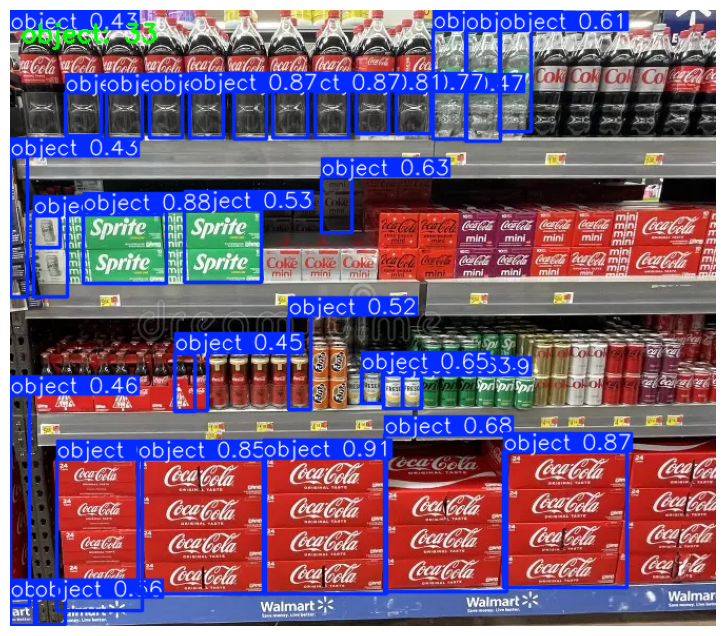

In [120]:
conteo = mostrar_conteos(model, RUTA_TST + rutas_imgs[6])